In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [86]:
df = pd.read_csv(r"C:\Users\sarab\OneDrive\Desktop\dnn problems\Kidney Stone Prediction\kidney-stone-dataset.csv")
df.head()

,Unnamed: 0,gravity,PH,osmosis,conductivity,urea,calcium,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [87]:
df.drop(columns='Unnamed: 0', inplace=True)

In [88]:
df.head()

,gravity,PH,osmosis,conductivity,urea,calcium,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


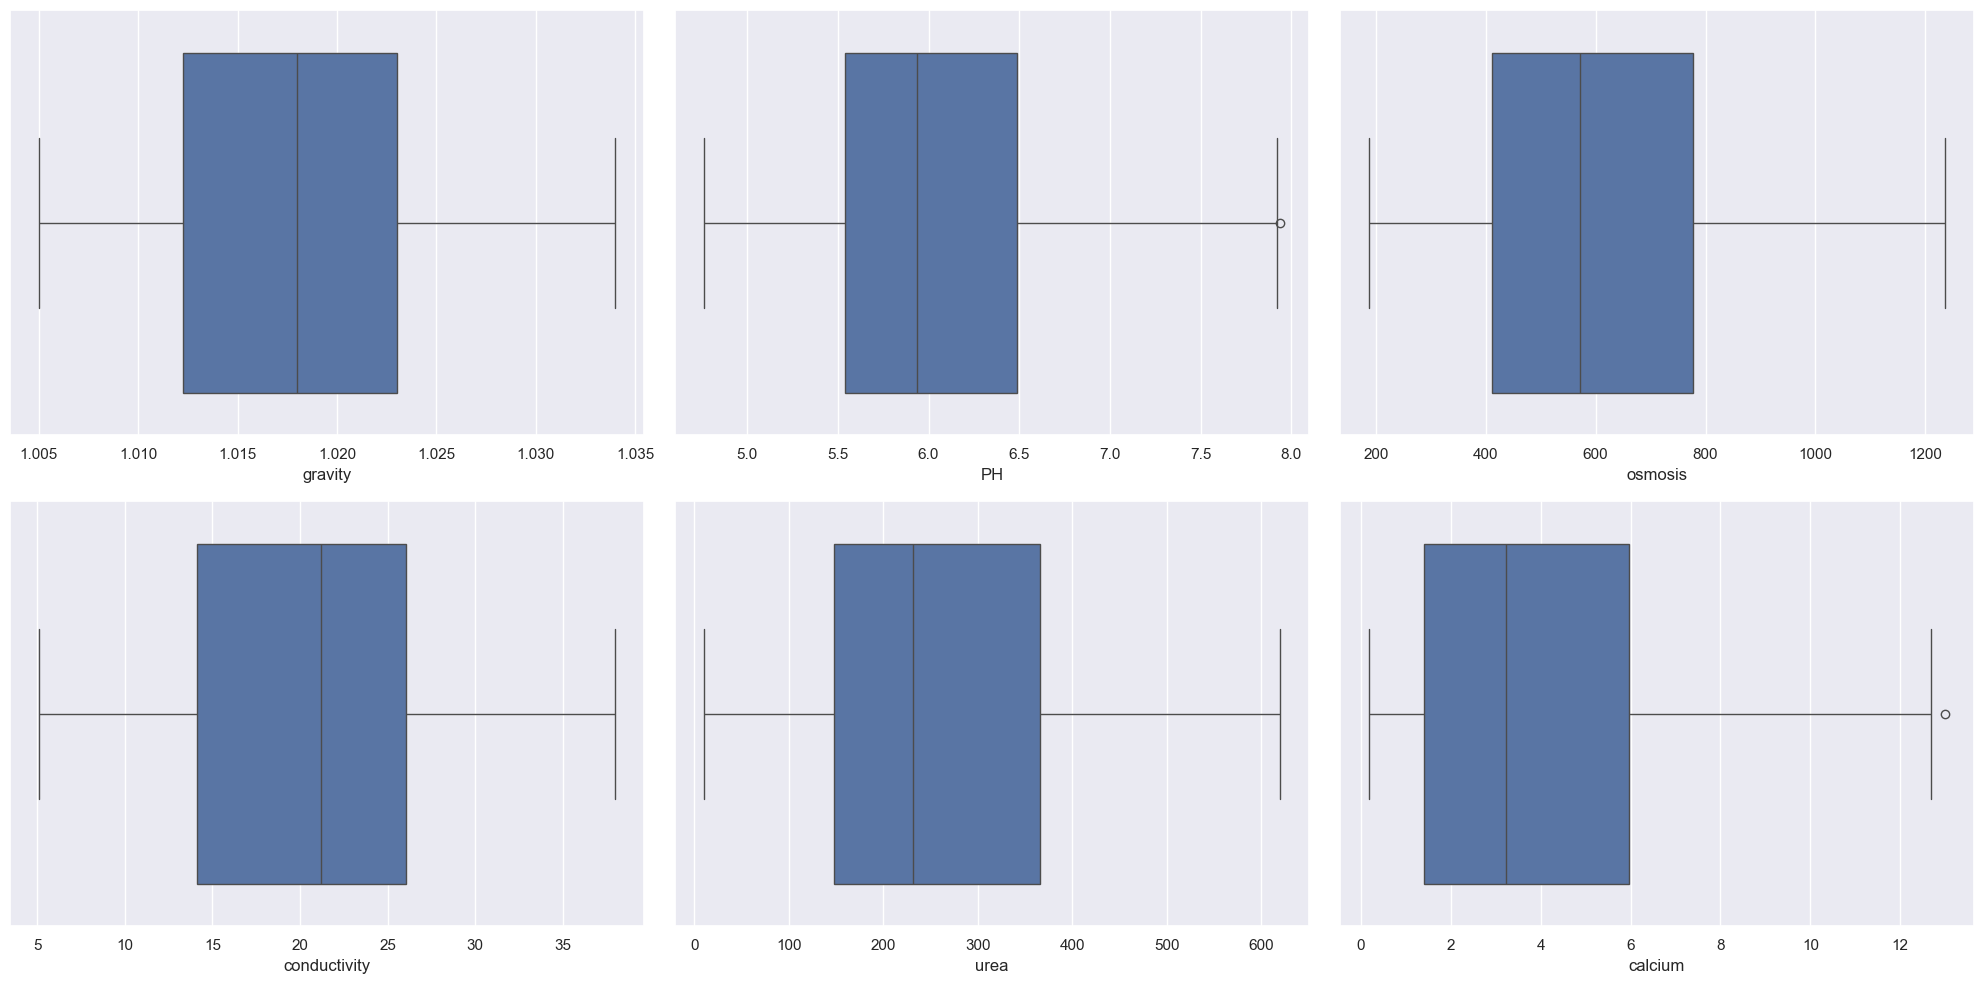

In [89]:
num_vars = ['gravity', 'PH', 'osmosis', 'conductivity', 'urea', 'calcium']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

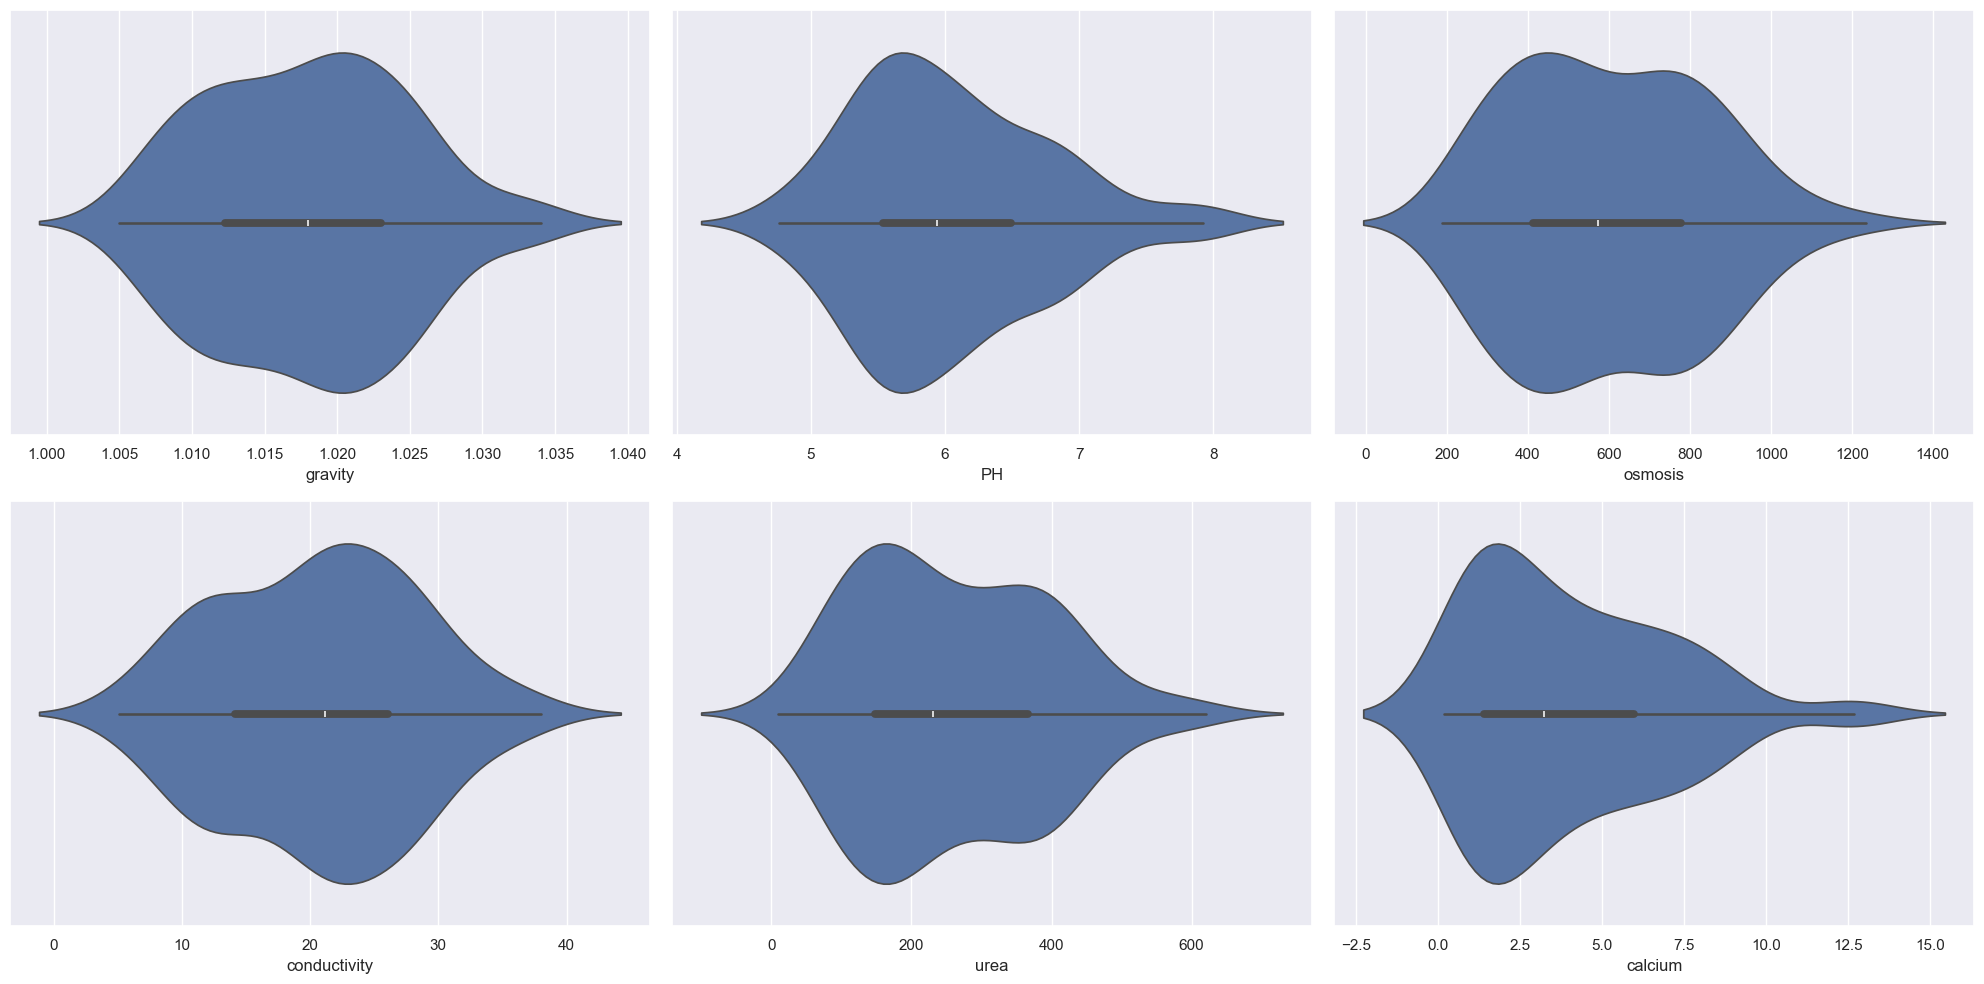

In [90]:
num_vars = ['gravity', 'PH', 'osmosis', 'conductivity', 'urea', 'calcium']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

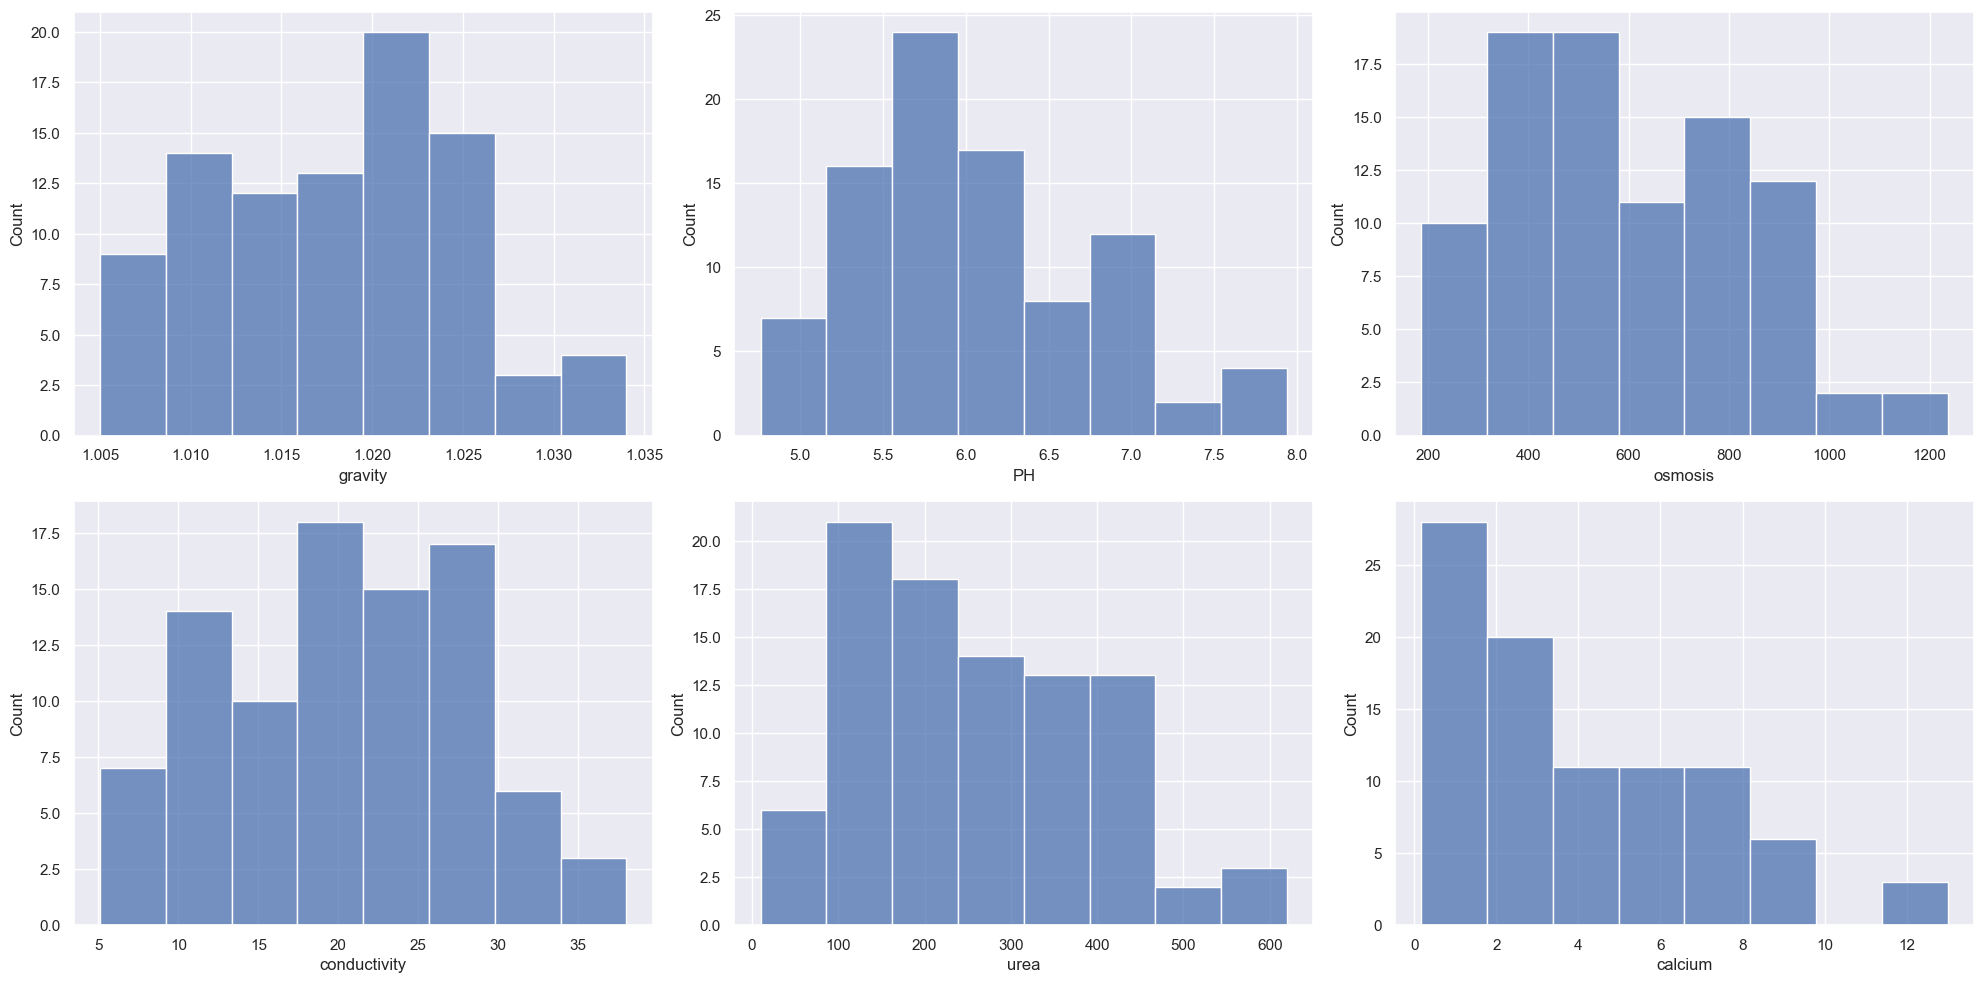

In [91]:
num_vars = ['gravity', 'PH', 'osmosis', 'conductivity', 'urea', 'calcium']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

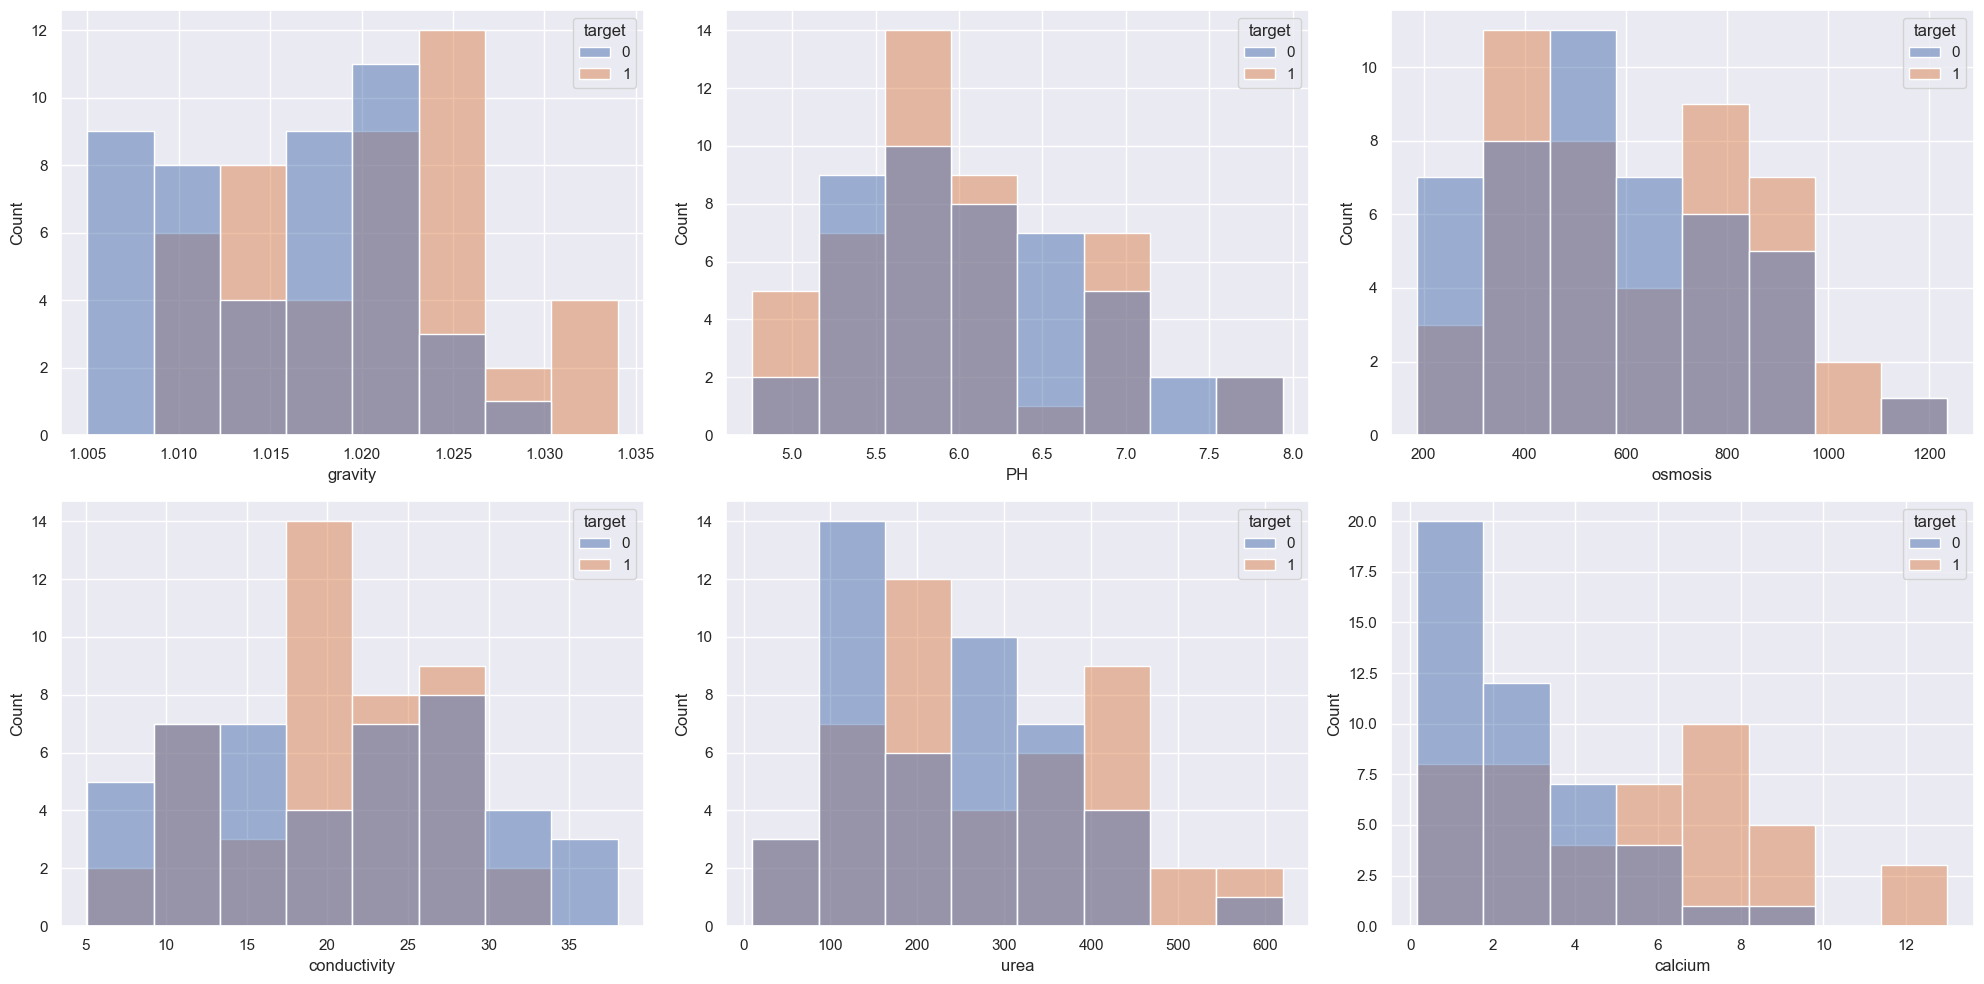

In [92]:
num_vars = ['gravity', 'PH', 'osmosis', 'conductivity', 'urea', 'calcium']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, hue='target', ax=axs[i])

fig.tight_layout()

plt.show()

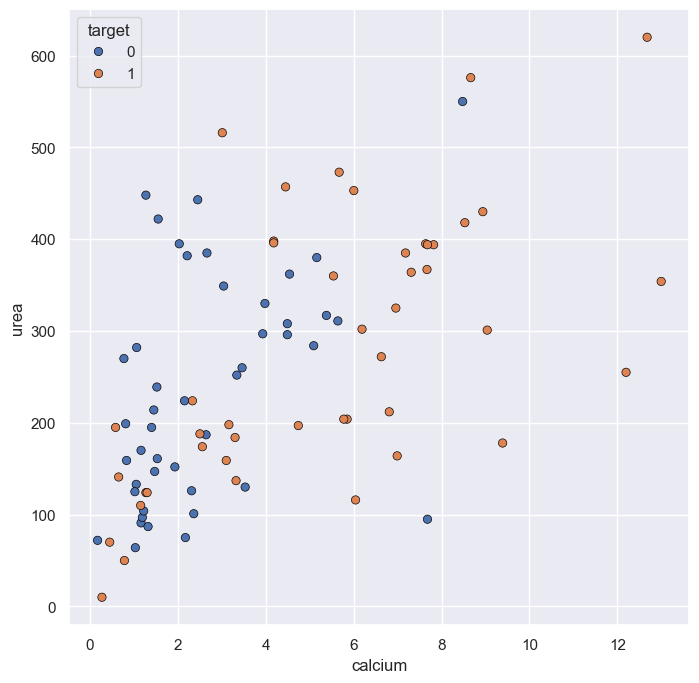

In [93]:
plt.figure(figsize=(8,8),dpi=100)
sns.scatterplot(x="calcium", y="urea", hue="target", data=df, edgecolor="black")
plt.show()

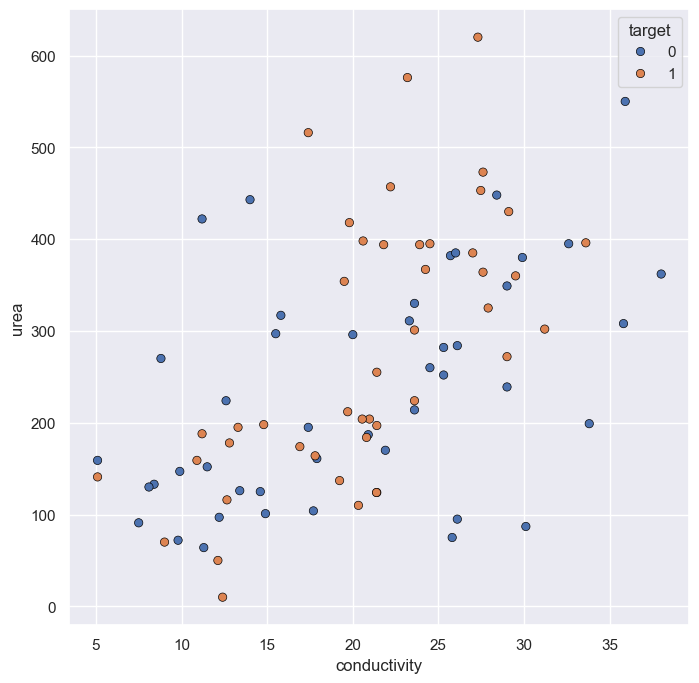

In [94]:
plt.figure(figsize=(8,8),dpi=100)
sns.scatterplot(x="conductivity", y="urea", hue="target", data=df, edgecolor="black")
plt.show()

In [95]:

check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

target
0    45
1    45
Name: count, dtype: int64

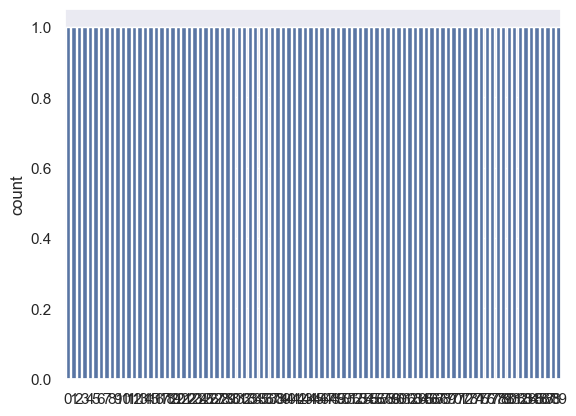

In [96]:
sns.countplot(df['target'])
df['target'].value_counts()

<Axes: >

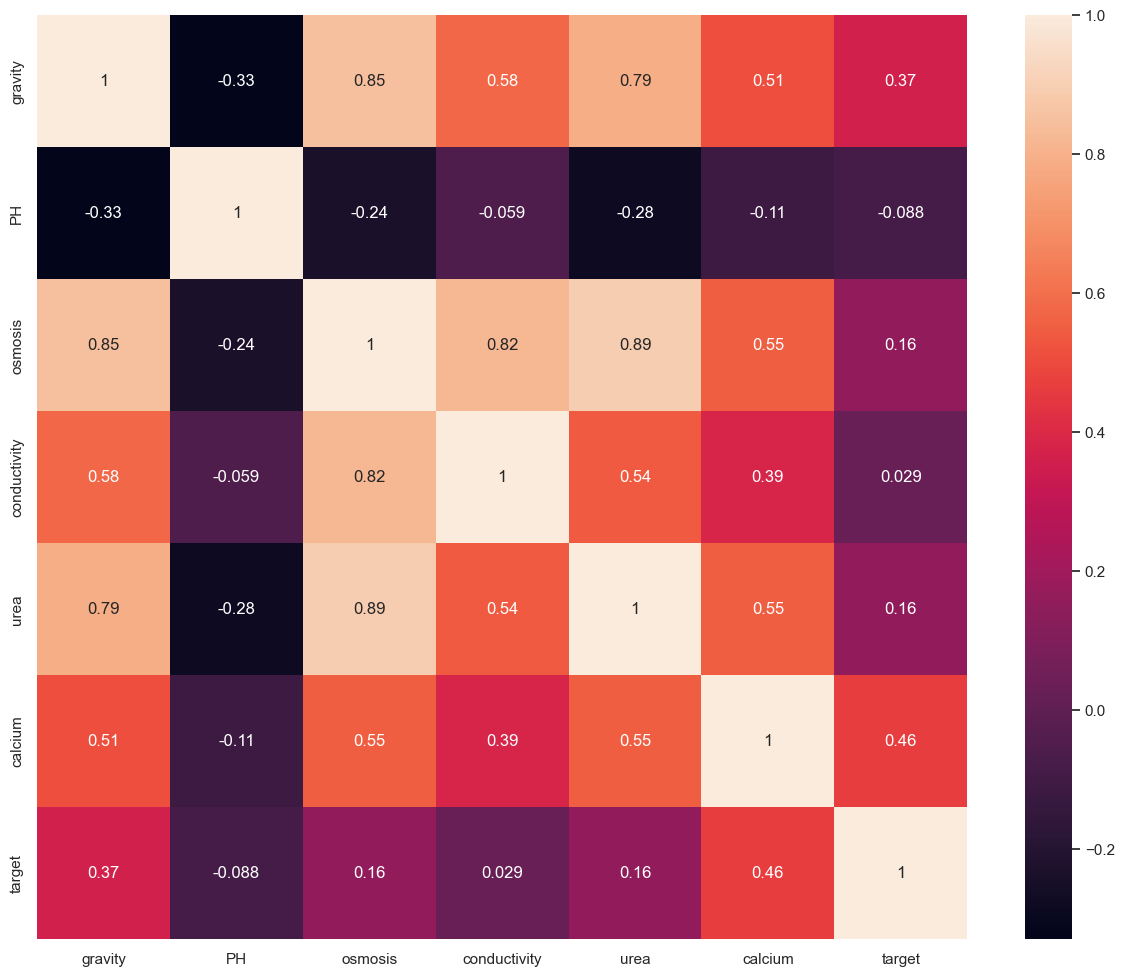

In [97]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [98]:
X = df.drop('target', axis=1)
y = df['target']

In [99]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}


grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [101]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_leaf=1, min_samples_split=4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=4, random_state=0)

In [102]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 66.67 %


In [103]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6666666666666666
Precision Score :  0.6666666666666666
Recall Score :  0.6666666666666666
Jaccard Score :  0.5
Log Loss :  12.014551129705717


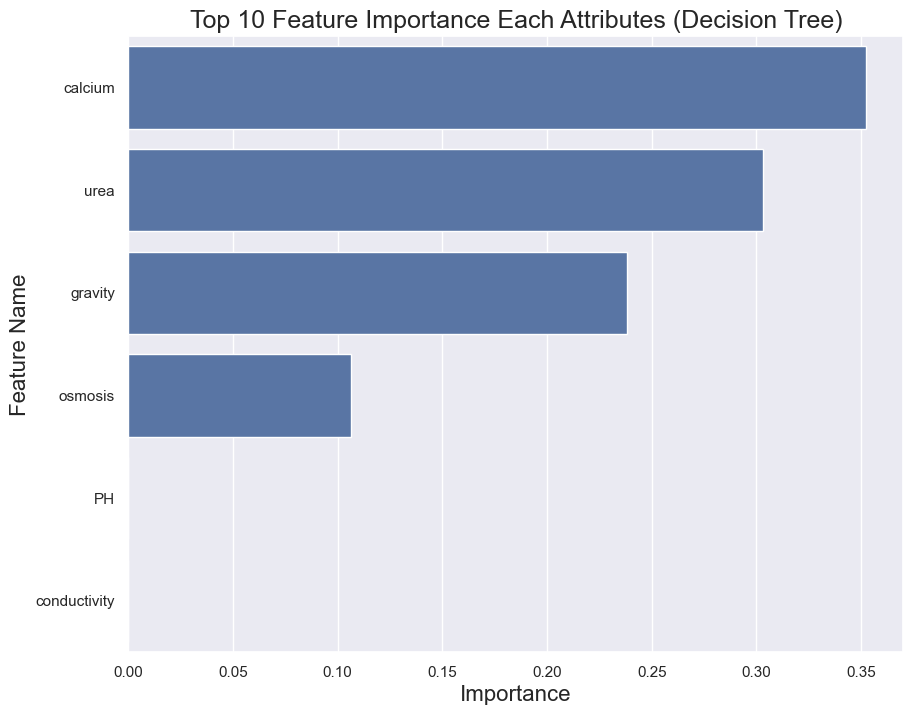

In [104]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

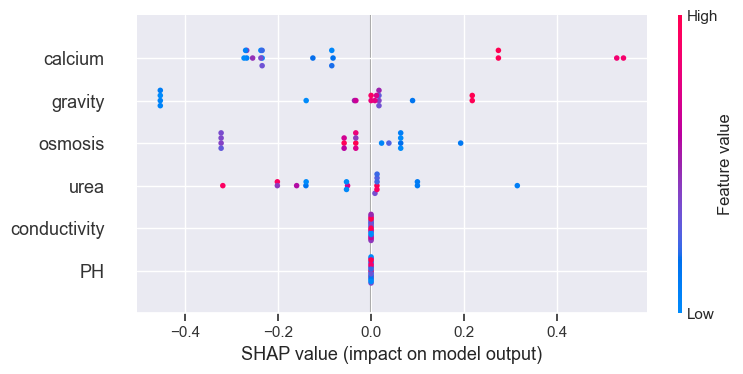

In [105]:

import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6666666666666666')

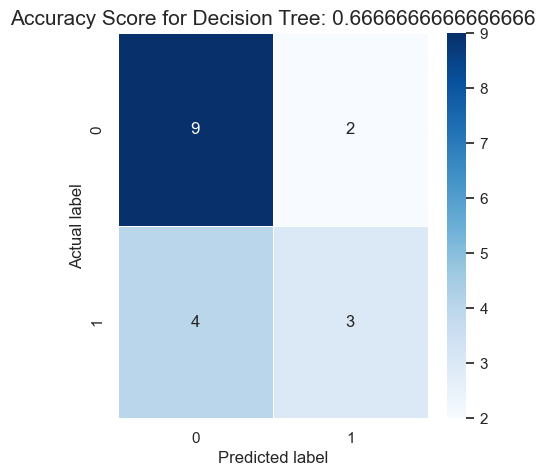

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

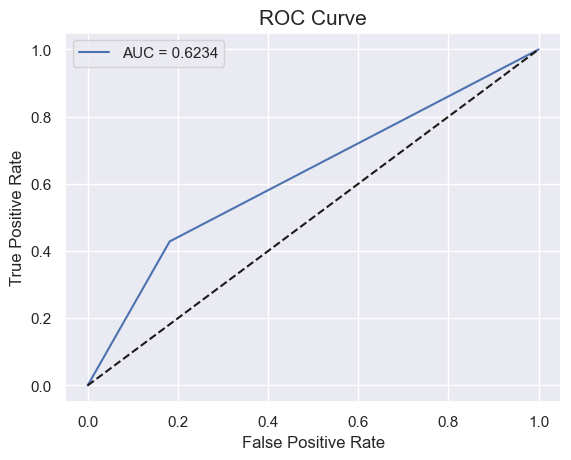

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [110]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 88.89 %


In [111]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8888888888888888
Precision Score :  0.8888888888888888
Recall Score :  0.8888888888888888
Log Loss :  4.004850376568573


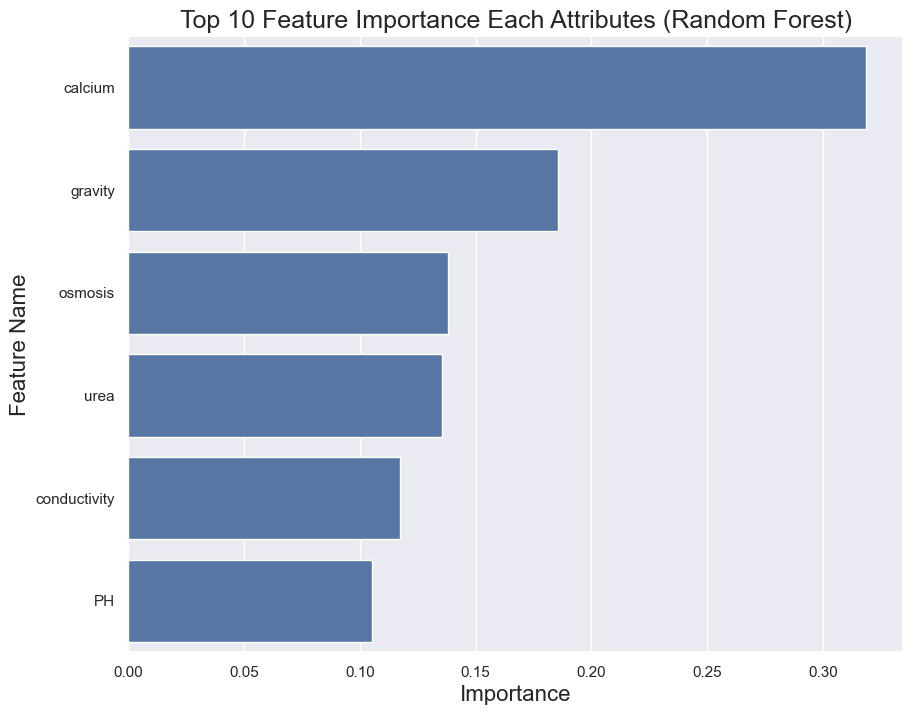

In [112]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

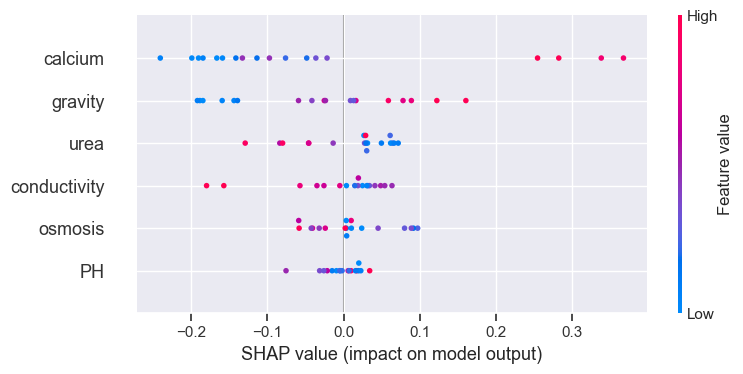

In [113]:

import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8888888888888888')

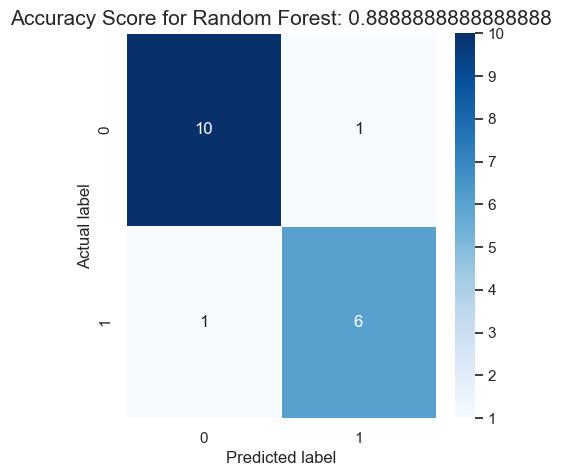

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

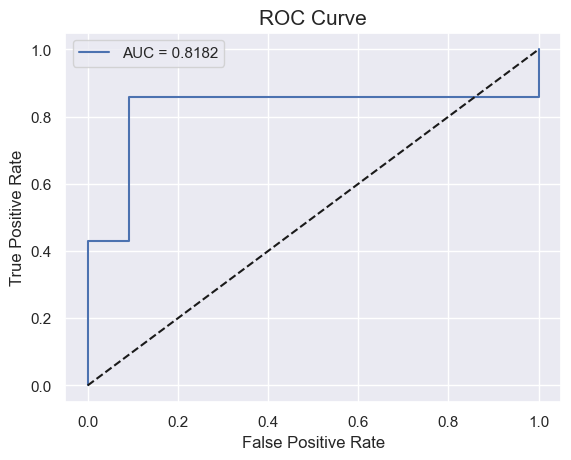

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


logreg = LogisticRegression(solver='liblinear', max_iter=10000)


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10]
}


grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

{'C': 0.1, 'penalty': 'l1'}


In [117]:
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression(solver='liblinear', max_iter=10000, C=0.1, penalty='l1')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear')

In [118]:
y_pred = logreg.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 66.67 %


In [119]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6666666666666666
Precision Score :  0.6666666666666666
Recall Score :  0.6666666666666666
Log Loss :  12.014551129705717


Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.6666666666666666')

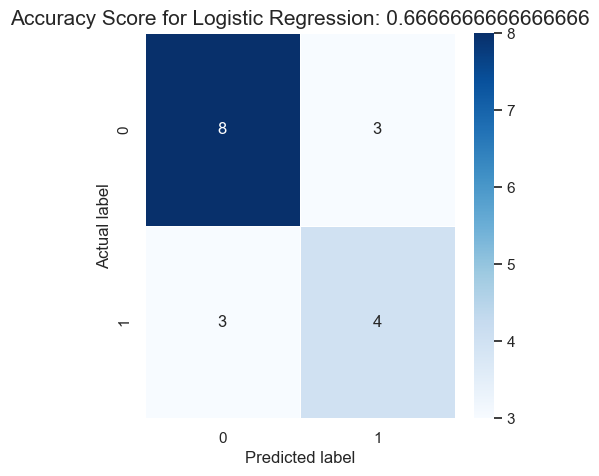

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(logreg.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

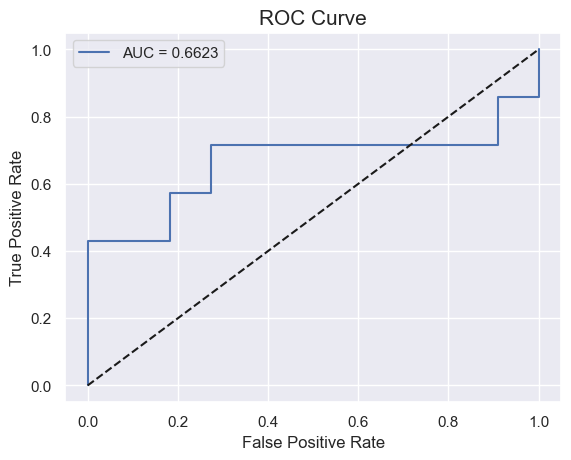

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = logreg.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()